### Problem Description

I am trying to classify Amazon food reviews to see if it's a postive or a negative review so, I Train my classification model on the text from the dataset linked below after the text is pre-proceeded and embedded by TFIDF.

Dataset: https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv


### Import Packages

In [1]:
# Add environment Packages paths to conda
import os, sys
env_name = "myenv"
sys.path.append(f"/Users/hadyelhossary/Library/Jupyter/kernels/myenv")

import pandas as pd
import numpy as np


In [2]:
# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer

In [3]:
# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

### Read Dataset

In [4]:
%%time
df = pd.read_csv('/Users/hadyelhossary/Downloads/Nawah/Practical-DS-Session-main/Food_Review/Reviews.csv')

CPU times: user 2.61 s, sys: 236 ms, total: 2.84 s
Wall time: 2.86 s


In [5]:
f"{df.shape[0]:,} Review"

'568,454 Review'

In [6]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


### Drop Duplicates
Save the Cleaned data-frame also with the variable `df_text`

In [7]:
## Write your code here
df_text = df_text.drop_duplicates(subset=['Text'])
f"{df_text.shape[0]:,} Review"

'393,579 Review'

### Target Variable Pre-Processing
`target` will be 
 - 0 if score < 3 
 - 1 otherwise

In [8]:
df_text['target'] = df_text['Score'].apply(lambda x: 0 if x < 3 else 1)
df_text

<ipython-input-8-638b151a0098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['target'] = df_text['Score'].apply(lambda x: 0 if x < 3 else 1)


,Text,Score,target
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,1
568450,I'm disappointed with the flavor. The chocolat...,2,0
568451,"These stars are small, so you can give 10-15 o...",5,1
568452,These are the BEST treats for training and rew...,5,1


#### Plot Countplot for target Variable

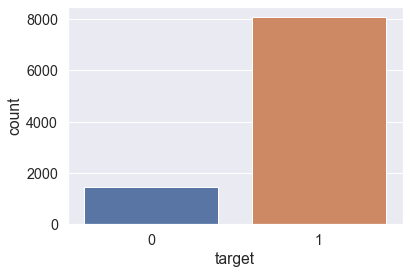

In [17]:
## Write your code here

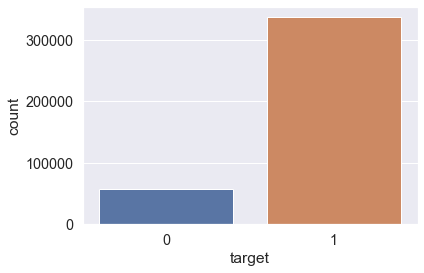

In [9]:
ax = sns.countplot(x='target', data=df_text)
ax

Notice how such variance is huge ...   
Then we need to down-sample such data ... by which both the positive and negative classes are balanced.

### Balance Data Target

In [10]:
# Sample from positive reviews Same number of negative reviews
NEG_N = df_text.target.value_counts()[0]

df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)

df_text_balanced = pd.concat([df_text.loc[df_pos.index], df_text[df_text.target == 0]])

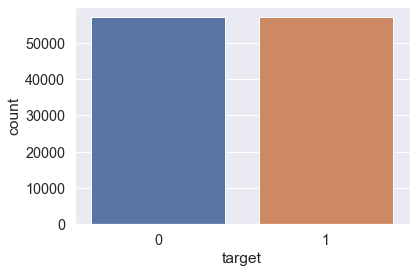

In [10]:
ax = sns.countplot(x='target', data=df_text_balanced)
ax

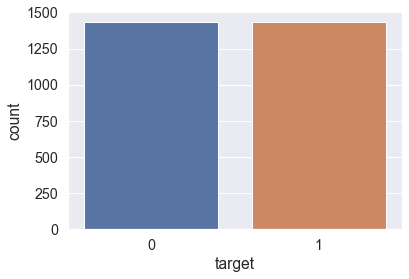

In [16]:
## PLot the target again after balancing
## Write your code here

### Text Pre-Processing

In [10]:
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stemmer = SnowballStemmer("english")
lemmatizer= WordNetLemmatizer()

In [12]:
## Clean your reviews using stemmer, lemmatizer & stopwords

In [12]:
# nltk.download('punkt')
def identify_tokens(row):
    text = row["Text"]
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df_text_balanced.Text = df_text_balanced.apply(identify_tokens, axis=1)
df_text_balanced.Text

42267     [I, have, modified, the, instructions, to, adj...
355363    [Luv, it, luv, it, luv, it, Glad, I, found, th...
545098    [I, currently, a, cashier, A, customer, got, m...
186548    [I, purchased, a, loaf, of, gluten, free, brea...
476836    [I, just, wanted, to, say, I, was, a, little, ...
                                ...                        
568433    [I, just, bought, this, soup, today, at, my, l...
568434    [This, soup, is, mostly, broth, Although, it, ...
568435    [It, is, mostly, broth, with, the, advertised,...
568446    [I, had, ordered, some, of, these, a, few, mon...
568450    [I, disappointed, with, the, flavor, The, choc...
Name: Text, Length: 114134, dtype: object

In [15]:
# nltk.download('wordnet')
def lemmatize_list(row):
    my_list = row['Text']
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemmatized_list)

df_text_balanced.Text = df_text_balanced.apply(lemmatize_list, axis=1)
df_text_balanced.Text

42267     [I, have, modified, the, instruction, to, adju...
355363    [Luv, it, luv, it, luv, it, Glad, I, found, th...
545098    [I, currently, a, cashier, A, customer, got, m...
186548    [I, purchased, a, loaf, of, gluten, free, brea...
476836    [I, just, wanted, to, say, I, wa, a, little, w...
                                ...                        
568433    [I, just, bought, this, soup, today, at, my, l...
568434    [This, soup, is, mostly, broth, Although, it, ...
568435    [It, is, mostly, broth, with, the, advertised,...
568446    [I, had, ordered, some, of, these, a, few, mon...
568450    [I, disappointed, with, the, flavor, The, choc...
Name: Text, Length: 114134, dtype: object

In [16]:
def remove_stops(row):
    my_list = row['Text']
    meaningful_words = [w for w in my_list if not w in stop_words]
    return (meaningful_words)

df_text_balanced.Text = df_text_balanced.apply(remove_stops, axis=1)
df_text_balanced.Text


42267     [I, modified, instruction, adjust, kind, Asian...
355363    [Luv, luv, luv, Glad, I, found, Amazon, carry,...
545098    [I, currently, cashier, A, customer, got, hook...
186548    [I, purchased, loaf, gluten, free, bread, usin...
476836    [I, wanted, say, I, wa, little, weary, I, love...
                                ...                        
568433    [I, bought, soup, today, local, grocer, brough...
568434    [This, soup, mostly, broth, Although, ha, kick...
568435    [It, mostly, broth, advertised, cup, vegetable...
568446    [I, ordered, month, back, great, latest, batch...
568450    [I, disappointed, flavor, The, chocolate, note...
Name: Text, Length: 114134, dtype: object

In [20]:
df_text_balanced.Text = [" ".join(review) for review in df_text_balanced.Text.values]

### Split Test & Training Data

In [21]:
X = df_text_balanced.Text
y = df_text_balanced.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Text Embedding
 - Use `TfidfVectorizer`
 - `fit` on the training data only
 - `transform` on training and test 

In [22]:
## TFIDF embedding for the Description
vectorizer = TfidfVectorizer(use_idf=True) ## Write your code here
# fit on training (such vectorizer will be saved for deployment)
vectorizer_tfidf = vectorizer.fit(df_text_balanced.Text) ## Write your code here
# transform on training data
X_train = vectorizer_tfidf.transform(X_train)  ## Write your code here
# transform on testing data
X_test = vectorizer_tfidf.transform(X_test) ## Write your code here

In [23]:
# See the dimensions of your data embeddings before entering to the model
X_train.shape, X_test.shape

((79893, 55974), (34241, 55974))

### Modelling

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### Sklearn framework steps
 - init
 - fit
 - predict

In [27]:
## initialize your Model
clf = LogisticRegression(max_iter=200)
# Fit your Model on the Training Dataset
clf.fit(X_train, y_train)
# Predict on Test data
preds = clf.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 86.45%


In [28]:
clf.classes_

array([0, 1])

### Raw Instance Prediction

In [62]:
def identify_tokens2(row):
    text = row
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

def lemmatize_list2(row):
    my_list = row
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemmatized_list)

def remove_stops2(row):
    my_list = row
    meaningful_words = [w for w in my_list if not w in stop_words]
    return (meaningful_words)

def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = identify_tokens2(review)
    review_c = lemmatize_list2(review_c)
    review_c = remove_stops2(review_c)
    review_c = " ".join(review_c)
    # Embed review using tf-idf vectorizer
    embedding = vectorizer.transform([review_c])
    # Predict using your model
    prediction = model.predict(embedding)
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [31]:
review_1 = "That's a good Dish, Good"
review_2 = "That's the worst Dish ever tasted"

In [32]:
raw_test(review_1, clf, vectorizer_tfidf)

'Positive'

In [33]:
raw_test(review_2, clf, vectorizer_tfidf)

'Negative'

### Saving Models for Deployment

In [12]:
import pickle

In [44]:
model_name = 'rf_model.pk'
vectorizer_name = 'tfidf_vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)

pickle.dump(clf, open(model_name, 'wb'))
pickle.dump(vectorizer_tfidf, open(vectorizer_name, 'wb'))
... ## Save model
... ## Save tfidf-vectorizer

Ellipsis

### Load model Again and test them

In [63]:
loaded_model = pickle.load(open(model_name, 'rb'))
loaded_vect = pickle.load(open(vectorizer_name, 'rb'))

In [64]:
raw_test(review_1, loaded_model, loaded_vect)

'Positive'

In [65]:
raw_test(review_2, loaded_model, loaded_vect)

'Negative'

# Great Job !
### Now Deploy your ML model using Streamlit Framework

In [13]:
# pip install streamlit
import streamlit as st